In [1]:
# Name : Tehmeena Akhtar
# Task4: A/B Testing

In [2]:
%pip install pandas
import pandas as pd

In [3]:
df=pd.read_csv('WA_Marketing_Campaign.csv')
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [22]:
# Last 5 rows
df.tail()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,high_sales_flag
543,10,Large,919,2,1,4,64.34,0
544,10,Large,920,14,2,1,50.20,0
545,10,Large,920,14,2,2,45.75,0
546,10,Large,920,14,2,3,44.29,0
547,10,Large,920,14,2,4,49.41,0


In [4]:
# we want to evaluate the impact of different promotions on sales.
# This means we'll treat different promotion types as different groups in our A/B test.

In [5]:
# Total rows and columns
df.shape

(548, 7)

In [6]:
df.size

3836

In [7]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 27.9+ KB


In [8]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [9]:
# Any null values?
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [10]:
df.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

In [11]:
threshold = 170
df['high_sales_flag'] = df['SalesInThousands'].apply(lambda x: 1 if x > threshold else 0)
high_sales_counts = df.groupby("Promotion")["high_sales_flag"].value_counts().unstack().fillna(0)
print(high_sales_counts)

high_sales_flag    0
Promotion           
1                172
2                188
3                188


In [12]:
%pip install seaborn
import seaborn as sns
%pip install matplotlib
import matplotlib.pyplot as plt

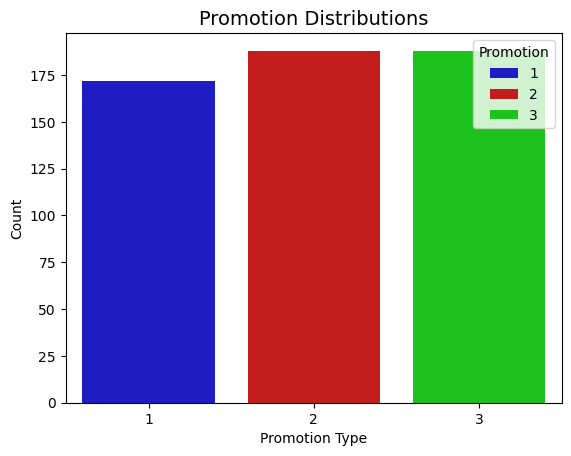

In [13]:
# Define colors for the plot
colors = ["#0101DF", "#DF0101", "#01DF01"]  
sns.countplot(x='Promotion', data=df,hue='Promotion', palette=colors)
plt.title('Promotion Distributions', fontsize=14)
plt.xlabel('Promotion Type')
plt.ylabel('Count')
plt.show()

In [14]:
# Calculate average sales for each promotion type
average_sales_by_promotion = df.groupby('Promotion')['SalesInThousands'].mean().reset_index()
average_sales_by_promotion = average_sales_by_promotion.rename(columns={'SalesInThousands': 'AverageSales'})
print(average_sales_by_promotion)

   Promotion  AverageSales
0          1     58.099012
1          2     47.329415
2          3     55.364468


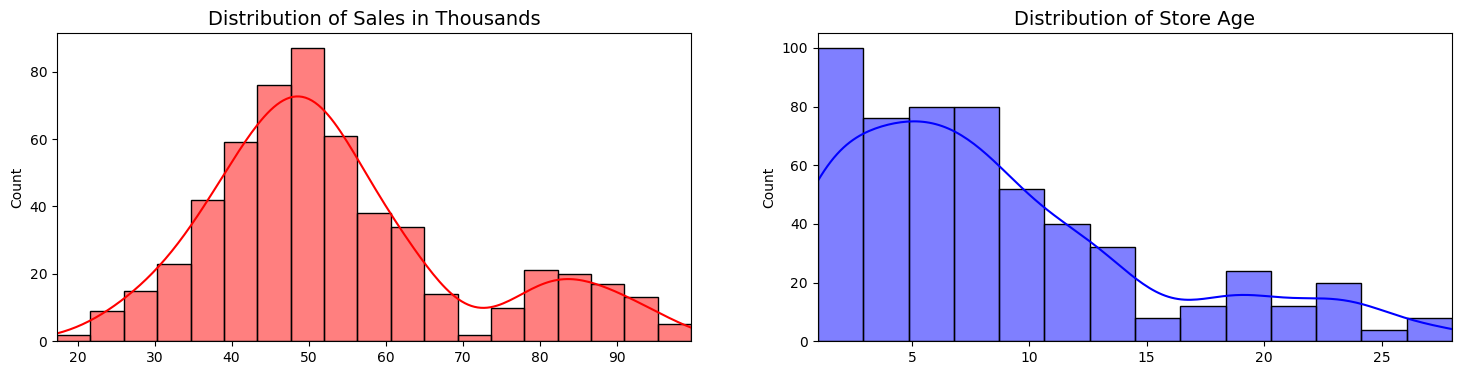

In [15]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sales_val = df['SalesInThousands'].values
age_val = df['AgeOfStore'].values

sns.histplot(sales_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Sales in Thousands', fontsize=14)
ax[0].set_xlim([min(sales_val), max(sales_val)])
# Distribution plot for store age
sns.histplot(age_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Store Age', fontsize=14)
ax[1].set_xlim([min(age_val), max(age_val)])
plt.show()

In [16]:
# Perform A/B Testing: Compare Promotion 1 (Control) and Promotion 2 (Test)
group_a = df[df['Promotion'] == 1]['SalesInThousands']
group_b = df[df['Promotion'] == 2]['SalesInThousands']

In [18]:
from scipy import stats

In [19]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)

In [20]:
# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 6.453671702181005
P-value: 3.5506696512134566e-10


In [21]:
# if we can reject the null hypothesis?
alpha = 0.05  
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Group A and Group B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Group A and Group B.")

Reject the null hypothesis: There is a significant difference between Group A and Group B.
